In [1]:
import numpy as np
import pandas as pd 
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\Ashutosh\ImmunoSense - Copy\Updated_Immunity_Data_Modified_v2.csv")
df.head()

,Protein Score,Age,BMI,Diabetes,Sleep Hours,Immunity_Score
0,72,50,24.746326,119,7.302998,34
1,42,41,24.261654,138,6.702963,26
2,64,48,22.396232,152,6.881304,37
3,31,64,27.526473,308,7.229609,22
4,40,33,25.971828,253,7.030298,21


In [3]:
df.shape

(5000, 6)

In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Protein_Score     0
Age               0
BMI               0
Diabetes          0
Sleep_Hours       0
Immunity_Score    0
dtype: int64


In [6]:

df.tail()

,Protein_Score,Age,BMI,Diabetes,Sleep_Hours,Immunity_Score
4995,48,36,28.045513,247,6.860236,29
4996,42,51,22.415800,374,7.299663,22
4997,85,15,20.909751,166,7.515601,24
4998,65,21,28.427243,333,7.201014,78
4999,111,65,23.287840,281,7.547022,29


In [7]:

df.shape

(5000, 6)

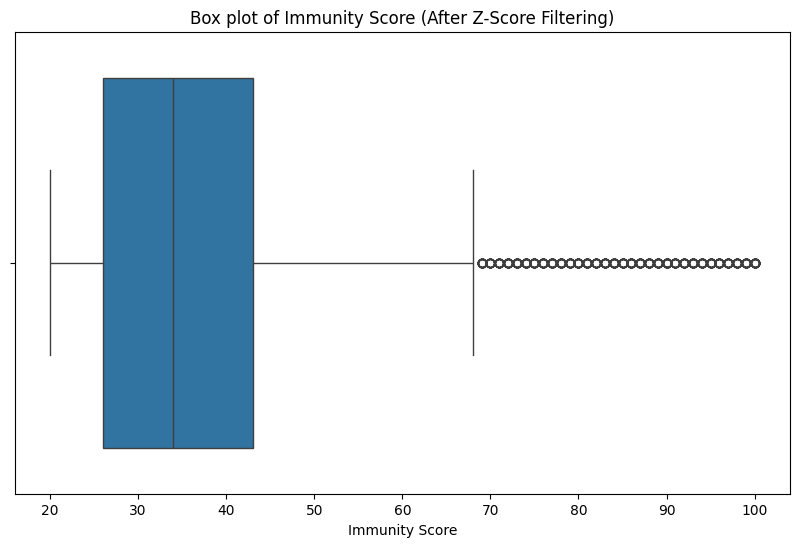

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Z-scores
z_scores = stats.zscore(df['Immunity_Score'])

# Set a threshold for Z-score
threshold = 3

# Filter out the outliers based on Z-score
df_cleanedz = df[(z_scores < threshold) & (z_scores > -threshold)]

# Plotting the box plot after Z-score filtering
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleanedz['Immunity_Score'])
plt.title('Box plot of Immunity Score (After Z-Score Filtering)')
plt.xlabel('Immunity Score')
plt.show()


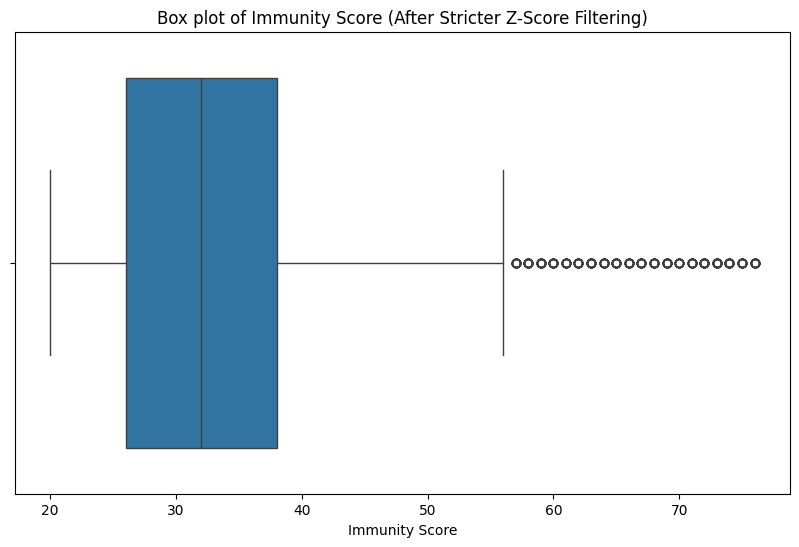

In [9]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Z-scores
z_scores = stats.zscore(df['Immunity_Score'])

# Set a threshold for Z-score (e.g., 2.5 for a stricter filter)
threshold = 1.75

# Filter out the outliers based on Z-score
df_cleanedz = df[(z_scores < threshold) & (z_scores > -threshold)]

# Plotting the box plot after Z-score filtering
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleanedz['Immunity_Score'])
plt.title('Box plot of Immunity Score (After Stricter Z-Score Filtering)')
plt.xlabel('Immunity Score')
plt.show()


In [10]:
df_cleanedz.shape

(4485, 6)

In [11]:
df_cleanedz.tail()

,Protein_Score,Age,BMI,Diabetes,Sleep_Hours,Immunity_Score
4994,93,40,29.323838,247,6.553266,27
4995,48,36,28.045513,247,6.860236,29
4996,42,51,22.415800,374,7.299663,22
4997,85,15,20.909751,166,7.515601,24
4999,111,65,23.287840,281,7.547022,29


In [12]:
df_cleanedz.head()

,Protein_Score,Age,BMI,Diabetes,Sleep_Hours,Immunity_Score
0,72,50,24.746326,119,7.302998,34
1,42,41,24.261654,138,6.702963,26
2,64,48,22.396232,152,6.881304,37
3,31,64,27.526473,308,7.229609,22
4,40,33,25.971828,253,7.030298,21


# DecisionTreeRegressor

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df is already defined and contains the data
X = df_cleanedz.drop(['Immunity_Score'], axis=1)
y = df_cleanedz['Immunity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and DecisionTreeRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
Mean Absolute Error (MAE): 6.358533700763363
Mean Squared Error (MSE): 61.98161796052452
Root Mean Squared Error (RMSE): 7.8728405268063515
R^2 Score: 0.6372370305327625


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Random Forest Regressor

In [14]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df is already defined and contains the data
X = df_cleanedz.drop(['Immunity_Score'], axis=1)
y = df_cleanedz['Immunity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'regressor__n_estimators': [100, 200],               # Reduced range for faster tuning
    'regressor__max_features': ['sqrt', 'log2'],         # Removed 'auto' as it's not valid
    'regressor__max_depth': [10, 20, 30],                # Reduced range
    'regressor__min_samples_split': [5, 10],             # Reduced range
    'regressor__min_samples_leaf': [2, 4],               # Reduced range
    'regressor__bootstrap': [True]                       # Fixed bootstrap to True
}

# Initialize RandomizedSearchCV with reduced iterations and fewer CV folds
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=30,            # Reduced number of iterations for faster execution
    cv=3,                 # Reduced number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1             # Utilize all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_

# Predict on test data
y_pred_rf = random_search.best_estimator_.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Best Parameters:", best_params)
print("Random Forest Metrics after Tuning:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R^2 Score:", r2_rf)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 10, 'regressor__bootstrap': True}
Random Forest Metrics after Tuning:
Mean Absolute Error (MAE): 5.999052050497785
Mean Squared Error (MSE): 52.1162086143961
Root Mean Squared Error (RMSE): 7.219155671849451
R^2 Score: 0.694976813829331


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Gradient Boosting Regressor

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df is already defined and contains the data
X = df_cleanedz.drop(['Immunity_Score'], axis=1)
y = df_cleanedz['Immunity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and GradientBoostingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define a smaller parameter grid for GridSearchCV to speed up execution
param_grid = {
    'regressor__n_estimators': [100, 200],                # Reduced number of estimators
    'regressor__learning_rate': [0.05, 0.1],              # Reduced range of learning rates
    'regressor__max_depth': [3, 4],                       # Reduced range for max depth
    'regressor__min_samples_split': [5, 10],              # Reduced range for min samples split
    'regressor__min_samples_leaf': [2, 4],                # Reduced range for min samples leaf
    'regressor__subsample': [0.9, 1.0]                    # Removed 0.8 to reduce combinations
}

# Initialize GridSearchCV with fewer parameters and reduced CV folds
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3,                    # Reduced number of cross-validation folds
    scoring='neg_mean_squared_error', 
    verbose=2, 
    n_jobs=-1                # Utilize all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Gradient Boosting Regressor Metrics after Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100, 'regressor__subsample': 0.9}
Gradient Boosting Regressor Metrics after Tuning:
Mean Absolute Error (MAE): 5.97901533014999
Mean Squared Error (MSE): 51.7871932856046
Root Mean Squared Error (RMSE): 7.196331932700478
R^2 Score: 0.6969024585865985


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# XGBoost

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Assuming df_cleanedz is already defined and contains the data
X = df_cleanedz.drop(['Immunity_Score'], axis=1)
y = df_cleanedz['Immunity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and XGBRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=42))
])

# Define a parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4],
    'regressor__min_child_weight': [1, 2],
    'regressor__subsample': [0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with XGBRegressor
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("XGBoost Regressor Metrics after Tuning:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Save the model as a .pkl file
model_filename = 'xgb_model.pkl'
joblib.dump(grid_search.best_estimator_, model_filename)
print(f"Model saved to {model_filename}")


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_child_weight': 1, 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}
XGBoost Regressor Metrics after Tuning:
Mean Absolute Error (MAE): 5.995001113534372
Mean Squared Error (MSE): 51.86095175239729
Root Mean Squared Error (RMSE): 7.2014548358229185
R^2 Score: 0.6964707686546883
Model saved to xgb_model.pkl


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:

import joblib

# Load the model and name it "model"
model = joblib.load('xgb_model.pkl')

# Use the loaded model for prediction
loaded_y_pred = model.predict(X_test)

# Evaluate the loaded model (optional)
loaded_mae = mean_absolute_error(y_test, loaded_y_pred)
loaded_mse = mean_squared_error(y_test, loaded_y_pred)
loaded_rmse = mean_squared_error(y_test, loaded_y_pred, squared=False)
loaded_r2 = r2_score(y_test, loaded_y_pred)

print("Loaded Model Metrics:")
print("Mean Absolute Error (MAE):", loaded_mae)
print("Mean Squared Error (MSE):", loaded_mse)
print("Root Mean Squared Error (RMSE):", loaded_rmse)
print("R^2 Score:", loaded_r2)


Loaded Model Metrics:
Mean Absolute Error (MAE): 5.995001113534372
Mean Squared Error (MSE): 51.86095175239729
Root Mean Squared Error (RMSE): 7.2014548358229185
R^2 Score: 0.6964707686546883


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


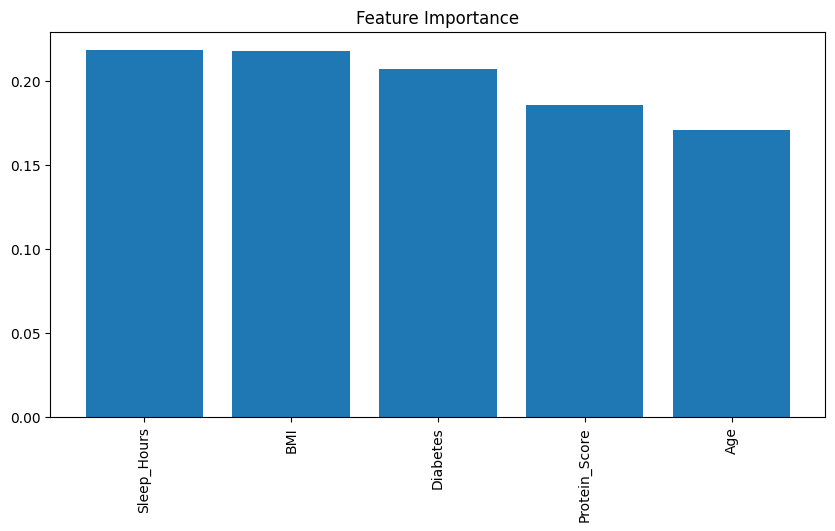

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Define the features and target
target_column = 'Immunity_Score'
X = df_cleanedz.drop(columns=[target_column])
y = df_cleanedz[target_column]

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


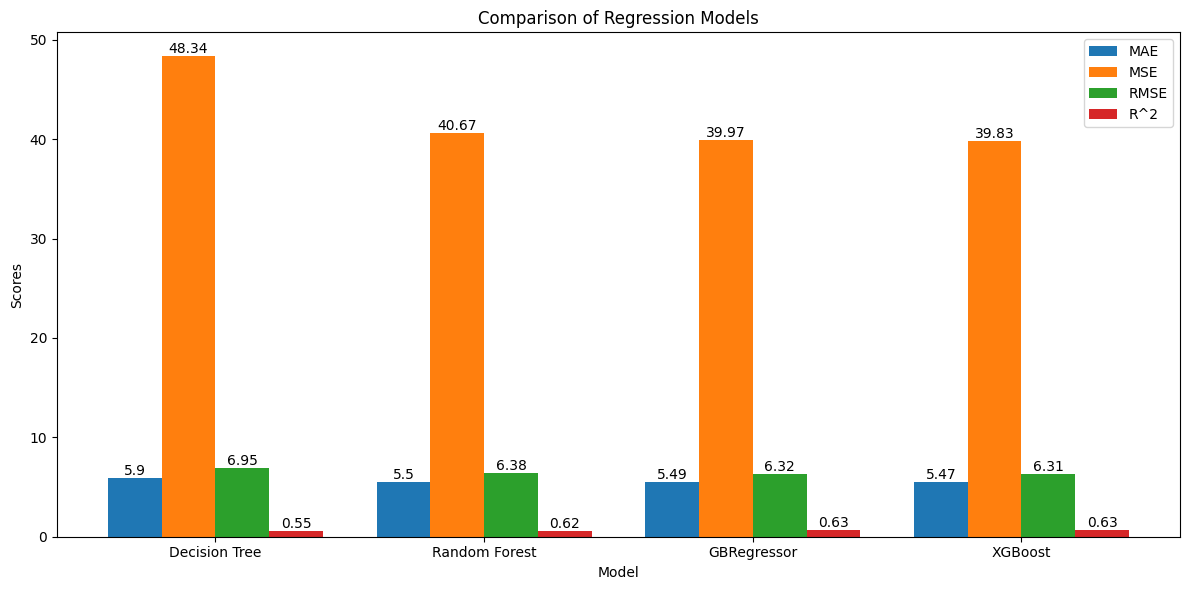

In [19]:
import matplotlib.pyplot as plt

model_scores = {
    "Decision Tree": {
       "MAE": 5.899786057785743,
        "MSE": 48.3409673304896,
        "RMSE": 6.952766883082561,
        "R^2": 0.5523082666512351
    },
    "Random Forest": {
        "MAE": 5.500078455471061,
        "MSE": 40.674397093307704,
        "RMSE": 6.377648241578372,
        "R^2": 0.6233093307147425
    },
    "GBRegressor": {
        "MAE": 5.488804799788191,
        "MSE": 39.97250682001857,
        "RMSE": 6.322381420004536,
        "R^2": 0.6298096241598689
    },
    "XGBoost": {
        "MAE": 5.472004358392013,
        "MSE": 39.8345227037308,
        "RMSE": 6.31145963337569,
        "R^2": 0.6310875122867892
    },
}

model_names = list(model_scores.keys())
metrics = list(model_scores[model_names[0]].keys())
scores = [[model_scores[model][metric] for metric in metrics] for model in model_names]

bar_width = 0.2
x = np.arange(len(model_names))
plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    bars = plt.bar(x + i * bar_width, [score[i] for score in scores], bar_width, label=metric)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), 
                 ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Models')
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, model_names)
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


X = df_cleanedz.drop(['Immunity_Score'], axis=1)
y = df_cleanedz['Immunity_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regressor': SVR(),
    'LightGBM Regressor': LGBMRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=0)
}

# Function to evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2': r2
        }
        print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}")
    return results

# Evaluate all models
results = evaluate_models(models, X_train, y_train, X_test, y_test)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the

Linear Regression - MAE: 9.021479822756532, MSE: 144.19836252044053, RMSE: 12.008262260645399, R^2: 0.1560429059218198
Ridge Regression - MAE: 9.021485104730573, MSE: 144.19797404465328, RMSE: 12.008246085280451, R^2: 0.15604517957382802
Lasso Regression - MAE: 9.028761990254601, MSE: 144.36539998328217, RMSE: 12.015215353179574, R^2: 0.15506527726308905
ElasticNet Regression - MAE: 9.02871180457662, MSE: 144.31931929905437, RMSE: 12.013297603033664, R^2: 0.1553349760285554


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Support Vector Regressor - MAE: 8.881815883938746, MSE: 155.86582409808506, RMSE: 12.48462350646126, R^2: 0.08775615982966578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 3588, number of used features: 5
[LightGBM] [Info] Start training from score 35.010312
LightGBM Regressor - MAE: 6.148608766167581, MSE: 55.53458969509469, RMSE: 7.452153359606516, R^2: 0.6749698809287632


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost Regressor - MAE: 6.217738677412945, MSE: 56.10422126596069, RMSE: 7.490275112835355, R^2: 0.6716359692473797
                               MAE         MSE       RMSE       R^2
Linear Regression         9.021480  144.198363  12.008262  0.156043
Ridge Regression          9.021485  144.197974  12.008246  0.156045
Lasso Regression          9.028762  144.365400  12.015215  0.155065
ElasticNet Regression     9.028712  144.319319  12.013298  0.155335
Support Vector Regressor  8.881816  155.865824  12.484624  0.087756
LightGBM Regressor        6.148609   55.534590   7.452153  0.674970
CatBoost Regressor        6.217739   56.104221   7.490275  0.671636


C:\Users\Ashutosh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
max_immunity_score = df['Immunity_Score'].max()
print("Maximum Immunity Score:", max_immunity_score)


Maximum Immunity Score: 100


In [22]:
min_immunity_score = df['Immunity_Score'].min()
print("Minimum Immunity Score:", min_immunity_score)


Minimum Immunity Score: 20


In [23]:
import pandas as pd

# Calculate mean
mean_immunity_score = df['Immunity_Score'].mean()

# Calculate median
median_immunity_score = df['Immunity_Score'].median()

# Calculate mode (if exists)
mode_immunity_score = df['Immunity_Score'].mode()

print("Mean Immunity Score:", mean_immunity_score)
print("Median Immunity Score:", median_immunity_score)
print("Mode Immunity Score:", mode_immunity_score)


Mean Immunity Score: 40.4412
Median Immunity Score: 34.0
Mode Immunity Score: 0    20
1    30
Name: Immunity_Score, dtype: int64
